In [31]:
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True) 

import pandas as pd
import numpy as np

In [50]:
#Visualizing thoroughbred foal crop size of 2022 in the US
foal_22 = pd.read_csv('Foal_Crops_by_State2022.csv') #Data taken from The Jockey Club

#Manually adding state abbreviation for mapping
state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}
foal_22['State Abr'] = foal_22['State'].map(state_abbrev)
foal_22.head()

,State,2013 Foals,2021 Foals,2022 Foals,Percentage Change (2013-2022),State Abr
0,Kentucky,7408,7893,7698,3.9,KY
1,New York,1468,1257,1316,-10.4,NY
2,California,1695,1309,1303,-23.1,CA
3,Florida,2162,1327,1141,-47.2,FL
4,Louisiana,1528,811,766,-49.9,LA


In [96]:
#Data dictionary for plotting
foal_data22 = dict(type='choropleth',
            colorscale = 'blues',
            #reversescale = True,
            locations = foal_22['State Abr'],
            z = foal_22['2022 Foals'],
            locationmode = 'USA-states',
            text = foal_22['State'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 1)),
            colorbar = {'title':"Number of Foals"}
            ) 

In [68]:
#Layout setting for plottin
layout = dict(title = '2022 Thoroughbred Foal Crop Size by State',
              geo = dict(scope = 'usa', showlakes = True))

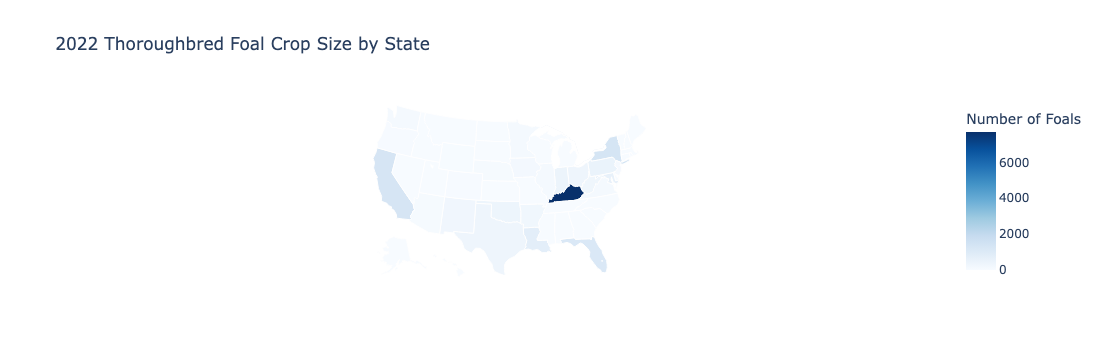

In [97]:
choromap = go.Figure(data = [foal_data22],layout = layout ,skip_invalid = True)
iplot(choromap)

In [94]:
# Create a log-transformed column for coloring purposes
foal_22['Log 2022 Foals'] = np.log10(foal_22['2022 Foals'] + 1)  # Add 1 to avoid log(0)

# Create the choropleth dictionary
foal_data22_log = dict(
    type = 'choropleth',
    colorscale = 'Blues', 
    #reversescale = True,
    locations = foal_22['State Abr'], 
    z = foal_22['Log 2022 Foals'],  # Log-transformed values for coloring
    locationmode = 'USA-states',
    text = foal_22.apply(lambda row: f"{row['State']}: {row['2022 Foals']} foals", axis=1),
    hoverinfo = 'location+text', # Hide log value when hovering over
    marker = dict(line = dict(color = 'rgb(255,255,255)', width = 2)),
    colorbar = {'title': "Log(Number of Foals)"}
)

#Layout setting for plottin
layout = dict(title = '2022 Thoroughbred Foal Crop Size by State', geo = dict(scope = 'usa', showlakes = True))

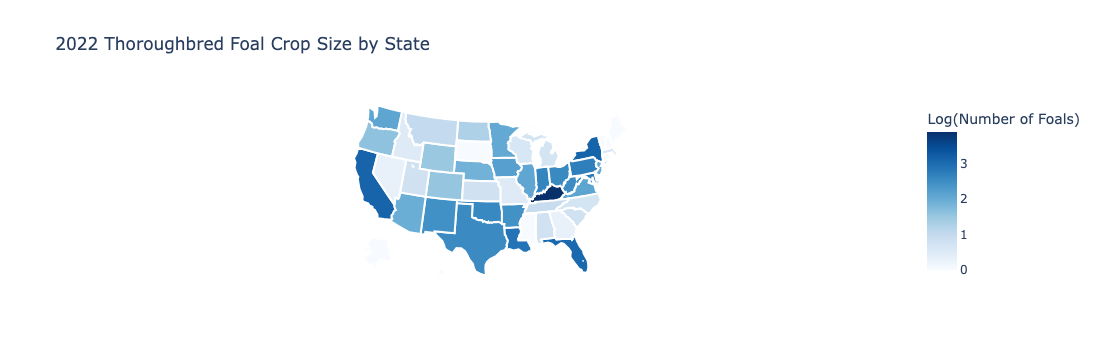

In [95]:
choromap2 = go.Figure(data = [foal_data22_log],layout = layout ,skip_invalid = True)
iplot(choromap2)